# Add date features

If your dataset does not have exogenous variables, you can add date features to inform the model for anomaly detection. This is done using the `date_features` argument. We can set it to `True` to extract all possible features, or pass a list of features we want to include.

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()
nixtla_client = NixtlaClient()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...
INFO:nixtla.nixtla_client:Using the following exogenous variables: month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014, year_2015, year_2016


<Axes: ylabel='features'>

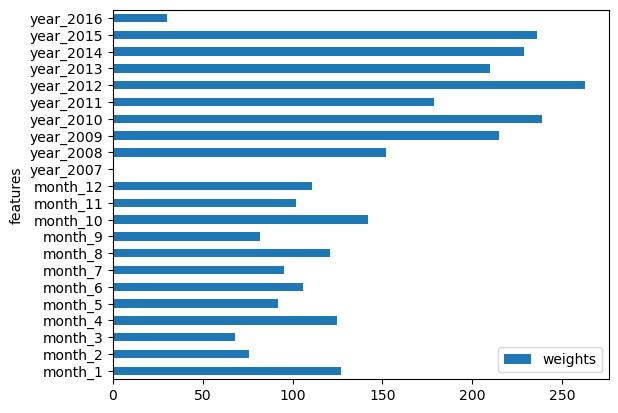

In [ ]:
# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/peyton_manning.csv')

# Add date features for anomaly detection
# Here, we use date features at the month and year levels
anomalies_df_x = nixtla_client.detect_anomalies(
    df, time_col='timestamp', 
    target_col='value', 
    freq='D', 
    date_features=['month', 'year'],
    level=99.99,
)

# Plot weights of date features
nixtla_client.weights_x.plot.barh(x='features', y='weights')

For more details, check out our in-depth tutorial on [anomaly detection](https://docs.nixtla.io/docs/tutorials/anomaly_detection).